<a href="https://colab.research.google.com/github/pauloalexx/Python_study/blob/main/Visualiza%C3%A7%C3%A3o_de_Dados_2_Extras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando Bibliotecas

In [ ]:
# instalando as bibliotecas
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install plotly
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importando Bibliotecas

In [ ]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Aulas de Visualização de dados 2 - Gráficos e funções extras

## Aula 1 - Funções Trigonométricas

### Plotagem de Funçõs matemáticas

#### Matplotlib, Seaborn, Plotly

Criando gráfico com MATPLOTLIB de funções matemáticas integrado com NUMPY

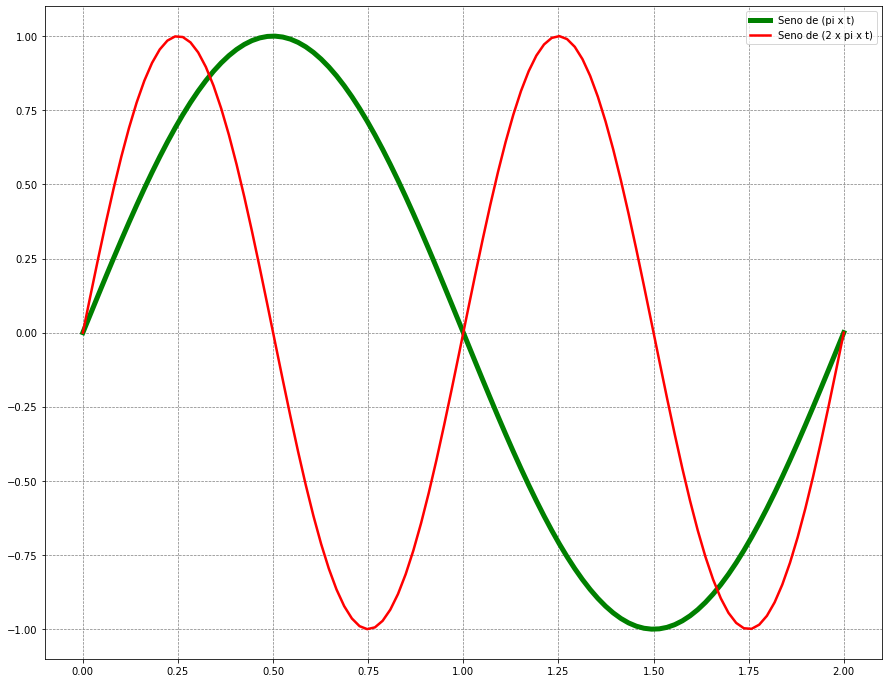

In [ ]:
# Gráfico com a MATPLOTLIB - Plotagem de funções matemáticas (integração com Numpy)

# criar uma matriz com a função linspace da Numpy

t = np.linspace(0.0,2,100)
test = np.linspace(1,10,10)
af = np.linspace(1,10,5)

# criar outras 2 matrizes com diferentes funções trigonométicas
f1 = np.sin(np.pi*t)
f2 = np.sin(2*np.pi*t)
f3 = np.pi*test

plt.figure(figsize=(15,12))
plt.plot(t,f1,linewidth=5,color='green',label='Seno de (pi x t)') # linewidth -> dimensionar a espessura do traço
plt.plot(t,f2,linewidth=2.5, color='red', label = 'Seno de (2 x pi x t)') # ; para retirar texto que aparece antes do gráfico
plt.legend() # com os labels escritos na formatação do gráfico, é necessário incluir a função plt.legend() para elas aparecerem.
plt.grid(b=True,color='grey',linestyle='--',linewidth=0.7)
# plt.plot(x,y) -> esses são os parâmetros básicos dos gráficos. Eixos X e Y
# plt.title('Senoides') -> erro abaixo
# para colocar título no gráfico, porém algum erro não está permitindo a inclusão


## Aula 2 - Diagrama de Correlação

Qual é a diferença entre dataset e banco de dados (database) ?

Por sua vez, o conceito de banco de dados existe há muito tempo, como um suporte para sistemas de processamento de dados. A principal diferença entre esses termos é que o dataset é uma amostra menor do que um database. É uma amostra específica para algum projeto, com uma relação muito clara entre os dados.

### **Objetivo do Projeto:** *Analisar a situação dos clientes do banco e apresentar um panorama para a empresa*

In [ ]:
# Utilizando SEABORN - Diagrama de correlação

# 0º Passo: Puxando o dataset
credit = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Clientes_renamed.xlsx')
# 1º Passo: Excluir colunas que não tem dados do tipo atributos
  # Atributo são dados classificados dos clientes, como idade, sexo, renda, crédito, etc... 
  # Atributos podem ser quantitativos ou qualitativos
credit.drop(['Unnamed: 0','ID'], axis=1, inplace=True) #axis indica linha ou coluna. 1 = coluna, 0 = linha. #inplace substitui esse dado no dataset original.


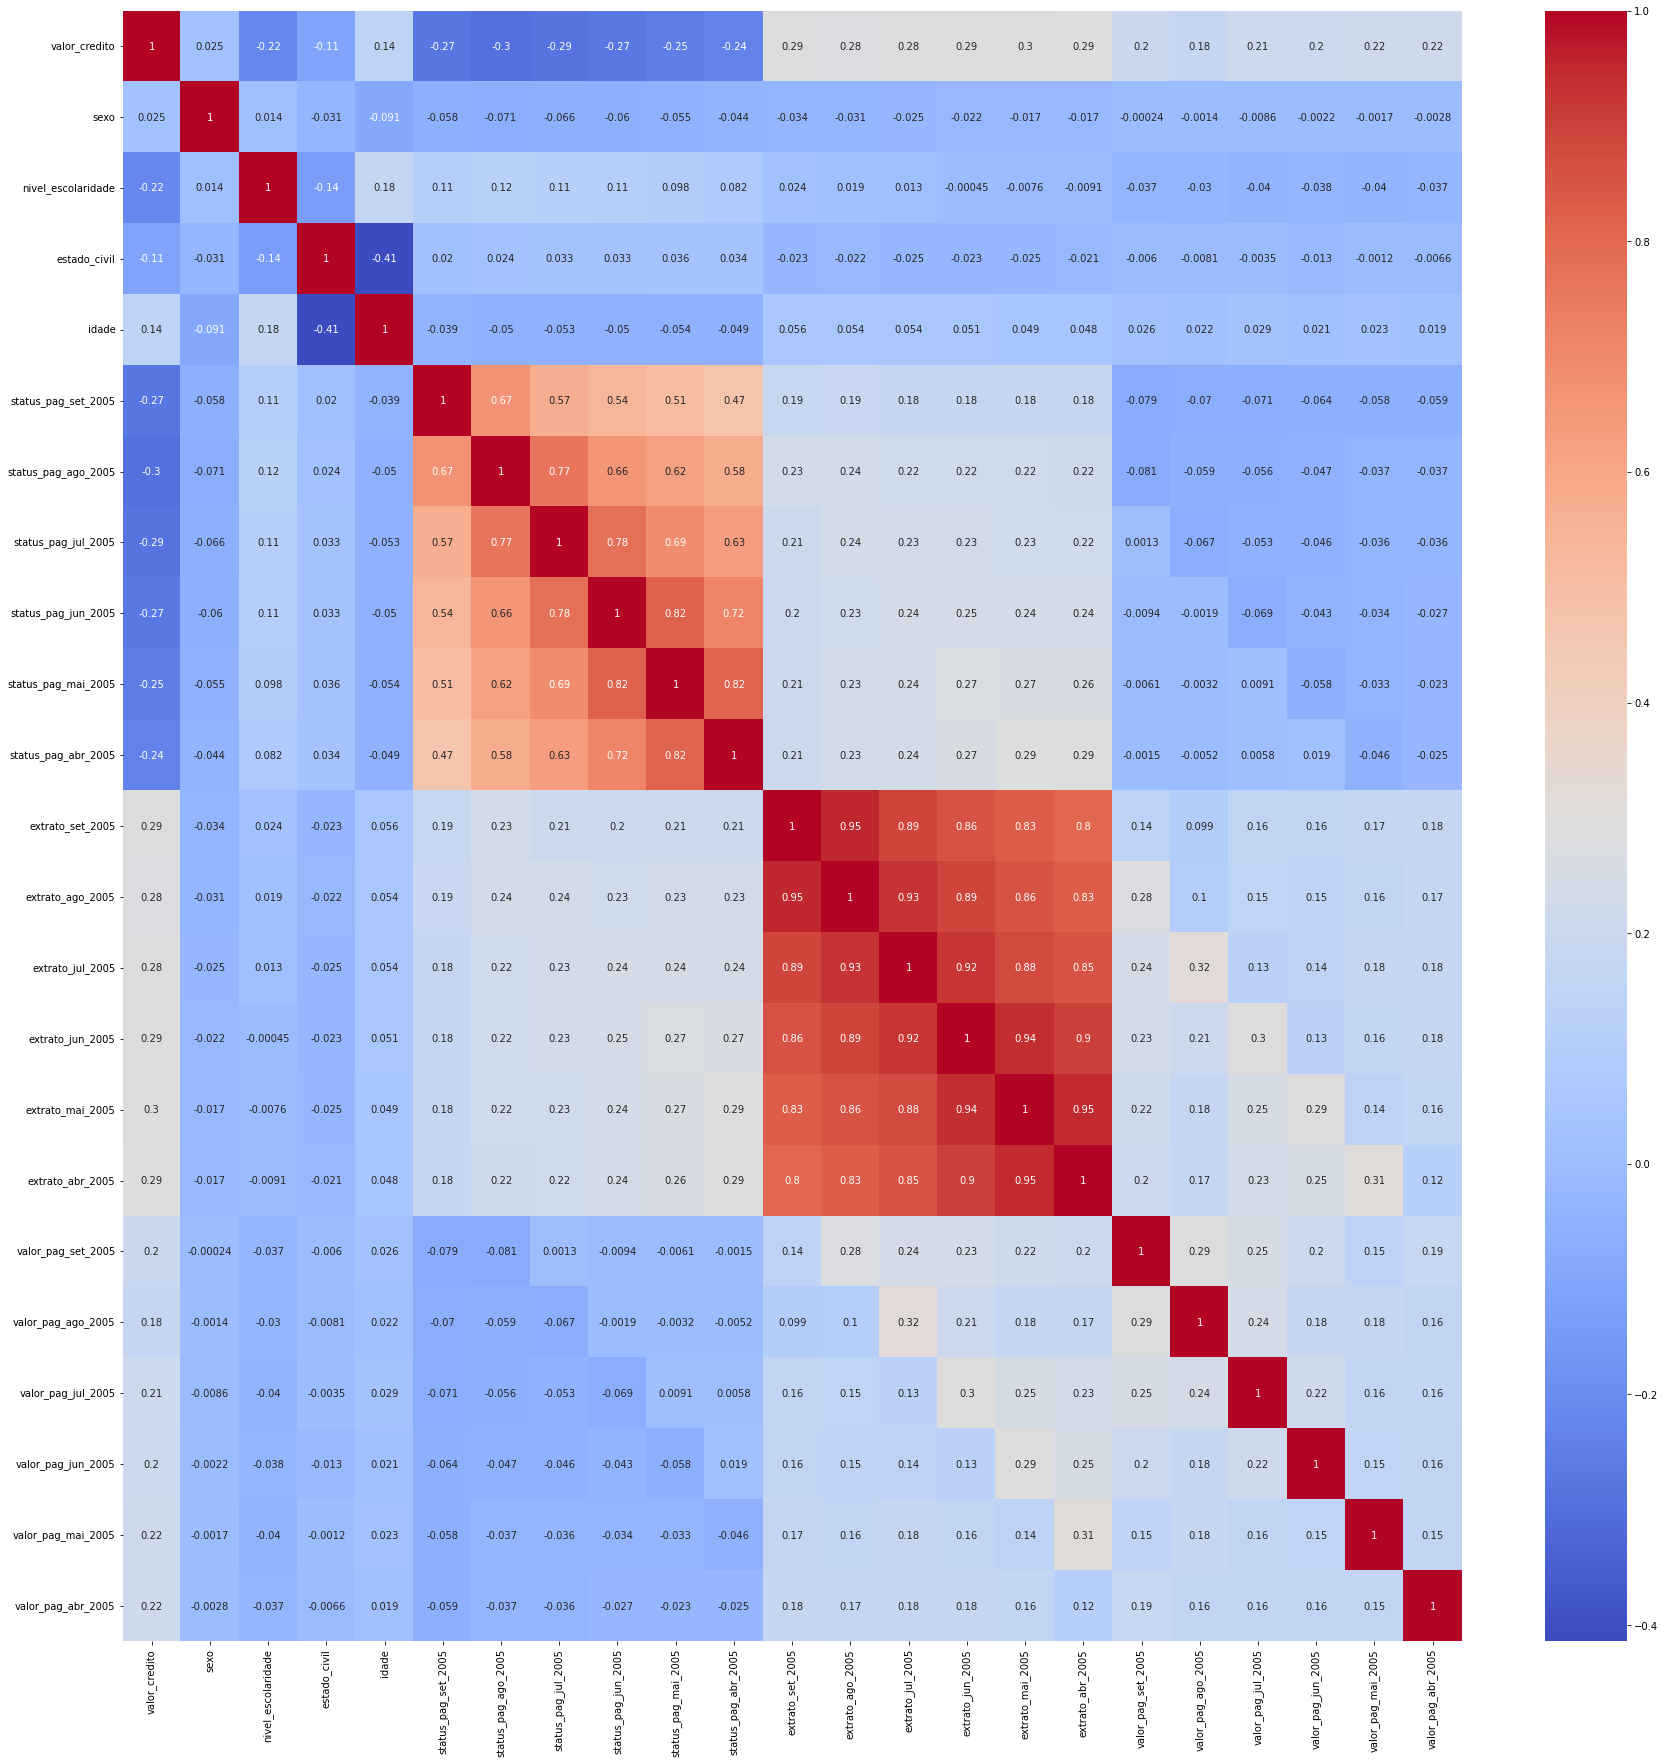

In [111]:
# 2º Passo: Criar o gráfico
plt.figure(figsize=(30,30)) # utilizando matplotlib pois a seaborn não tem função específica para definir o tamanho da figura onde será plotado o gráfico
  ## heatmap -> é um mapa de calor, gráfico de calor. Usado para indicar em nível de cores as relações. Maior a relação, cores mais intensas(fortes).
sns.heatmap(credit.corr(),annot=True, cmap='coolwarm'); # .corr -> função para criar a correlação
  ## annot -> inclui os valores
  ## cmap -> arruma a paleta de cores para cores mais frias, baixa relação e cores mais quentes, alta relação

## Aula 3 - Gráfico Violin

***O Violin é um casamento entre histograma e boxplot***

### **Objetivo:** *Avaliar a variação de crédito segundo estado civil*

In [135]:
# Gráfico com PLOTLY - Violin

# Alterando informação apresentada
estado = {0:'Viuvo',1:'Casado',2:'Solteiro',3:'Divorciado'}
sex = {1:'Feminino',2:'Masculino'}
# Foi usado o código "credit['estado_civil'].replace(estado)" direto na configuração do gráfico para alterar os números pela representação que eu configurei sem alterar o dataset
# 1º Passo - Chamar ou subir o dataset
  ## Passo já realizado no início do notebook
# credit['estado_civil'].replace({1:'Casado'})

# 2º Passo - Criando o gráfico
fig = px.violin(credit, x=credit['estado_civil'].replace(estado),y='valor_credito',color=credit['sexo'].replace(sex),box=True , title='Valor de crédito concedido segundo o estado civil por sexo') # box = True or False. Se digitar True aparece o boxplot dentro do violino
fig.show()

# o corpo do violino indica a densidade/concentração dos dados. Quanto mais gordo, mais pessoas naquela condição.

## Aula 4 - Gráfico de Dispersão (Scatter plot)

**Objetivo:** *Fazer uma sintese dos clientes no mês de setembro*

In [143]:
# Gráfico de dispersão - Scatter
stat = {-2:'Em dia',-1:''}
credit

# express - px
# categorizado por estado civil
fig = px.scatter(credit, x='status_pag_set_2005',y='valor_pag_set_2005', color=credit['estado_civil'].replace(estado), title="Sintese da situação dos clientes em setembro/05", size='valor_credito')

# parâmetro size = 'categoria do dataset' seta bolas maiores para quem tem maior número na categoria escolhida
fig.show()
fig.write_html('Gráfico de dispersão.html')